# Homework 3: Visualization, Correlation, and Linear Models

## 0. Download the data from: 

* [https://www.kaggle.com/datasnaek/youtube-new](https://www.kaggle.com/datasnaek/youtube-new)

YouTube provides a list of trending videos on it's site, determined by user interaction metrics such as likes, comments, and views. This dataset includes months of daily trending video across five different regions: the United States ("US"), Canada ("CA"), Great Britain ("GB"), Germany ("DE"), and France ("FR").

* https://www.kaggle.com/abcsds/pokemon

"This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed."

## Part 1: Answer the questions below based on the *[YouTube dataset](https://www.kaggle.com/datasnaek/youtube-new)*
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

In [120]:
# Import Python packages
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf 

In [121]:
# Import YouTube data for each region
usa = pd.read_csv('data/youtube-new/USvideos.csv')

canada = pd.read_csv('data/youtube-new/CAvideos.csv')

g_britain = pd.read_csv('data/youtube-new/GBvideos.csv')

germany = pd.read_csv('data/youtube-new/DEvideos.csv')

france = pd.read_csv('data/youtube-new/FRvideos.csv')

In [122]:
usa.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [123]:
# Import Pokemon data
pokemon = pd.read_csv('data/Pokemon.csv')

In [124]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Q1. For 10 Points: Compare the distributions of comments, views, likes, and dislikes

* Plot histograms for these metrics *for the US*. What can you say about them?
* Try to apply a log transformation, and plot the histograms again. How do they look now?
* Create a pairplot *for the US*, as we did in this week's lab. Do you see anything interesting?
* Create additional pairplots for the other four regions. Do they look similar?

In [11]:
# Take a look at the data and the data types to see what we have to work with
# usa.head()

# Looks like the data is in a format that we can work with - all are in int64 format
usa.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [16]:
# Lets check for any null values in our data
# usa.isnull().comment_count.any()
# usa.isnull().views.any()
# usa.isnull().likes.any()
usa.isnull().dislikes.any()

# There are no null values in any of the data columns

False

In [21]:
# usa.head()

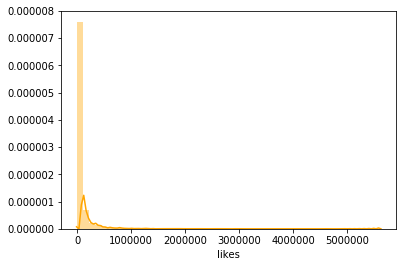

In [24]:
sns.distplot(usa.likes, color='orange', label='Likes')

**Histograms of US YouTube data for comments, views, likes, and dislikes**

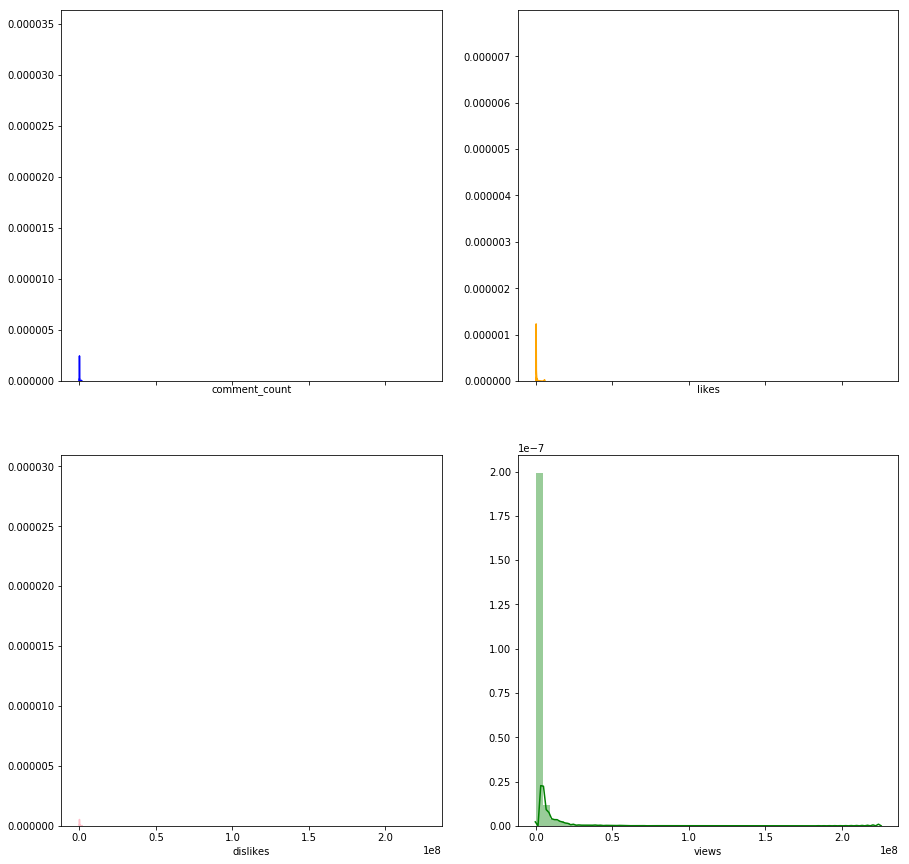

In [42]:
# Plot histograms for comment_count, views, likes, and dislikes
f, axes = plt.subplots(2,2, figsize=(15,15), sharex=True)
sns.distplot(usa.comment_count, color='blue', ax=axes[0, 0])
sns.distplot(usa.views, color='green', ax=axes[1, 1])
sns.distplot(usa.likes, color='orange', ax=axes[0, 1])
sns.distplot(usa.dislikes, color='pink', ax=axes[1, 0])

**[Log transformed] Histograms of US YouTube data for comments, views, likes, and dislikes**

In [91]:
# # Create new columns for log transformed data, then plot data -- **THIS DID NOT WORK, GOT INFINITE VALUES**
# usa['log_comments'] = round(usa['comment_count'].apply(np.log), 2)
# usa['log_views'] = round(usa['views'].apply(np.log), 2)
# usa['log_likes'] = round(usa['likes'].apply(np.log), 2)
# usa['log_dislikes'] = round(usa['dislikes'].apply(np.log), 2)
# # usa.head()

In [65]:
# Plot histograms for comment_count, views, likes, and dislikes
# f, axes = plt.subplots(2,2, figsize=(15,15), sharex=True)
# sns.distplot(usa.comment_count, color='blue', ax=axes[0, 0], hist_kws={'log':True})
# sns.distplot(usa.views, color='green', ax=axes[1, 1], hist_kws={'log':True})
# sns.distplot(usa.likes, color='orange', ax=axes[0, 1], hist_kws={'log':True})
# sns.distplot(usa.dislikes, color='pink', ax=axes[1, 0], hist_kws={'log':True})

**USA Comment Count plotted on log scale**

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


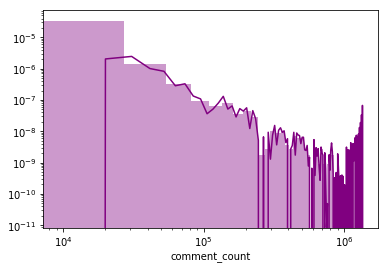

In [92]:
fig, ax = plt.subplots()
ax.set(xscale='log', yscale='log')
sns.distplot(usa.comment_count, color='purple', ax=ax)

**USA Views plotted on log scale**

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


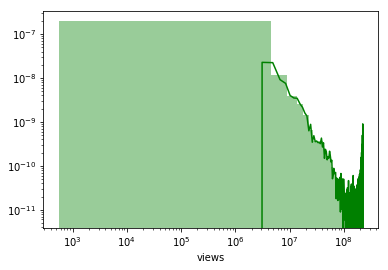

In [93]:
fig, ax = plt.subplots()
ax.set(xscale='log', yscale='log')
sns.distplot(usa.views, color='green', ax=ax)

**USA Dislikes plotted on log scale**

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


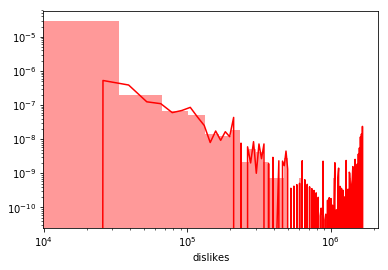

In [94]:
fig, ax = plt.subplots()
ax.set(xscale='log', yscale='log')
# sns.distplot(usa.likes, color='yellow', ax=ax)
sns.distplot(usa.dislikes, color='red', ax=ax)

**USA Likes plotted on log scale**

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


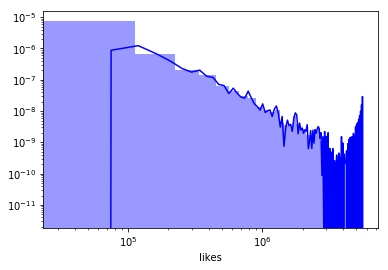

In [95]:
fig, ax = plt.subplots()
ax.set(xscale='log', yscale='log')
sns.distplot(usa.likes, color='blue', ax=ax)

**Pairplot for US data - what's interesting?**

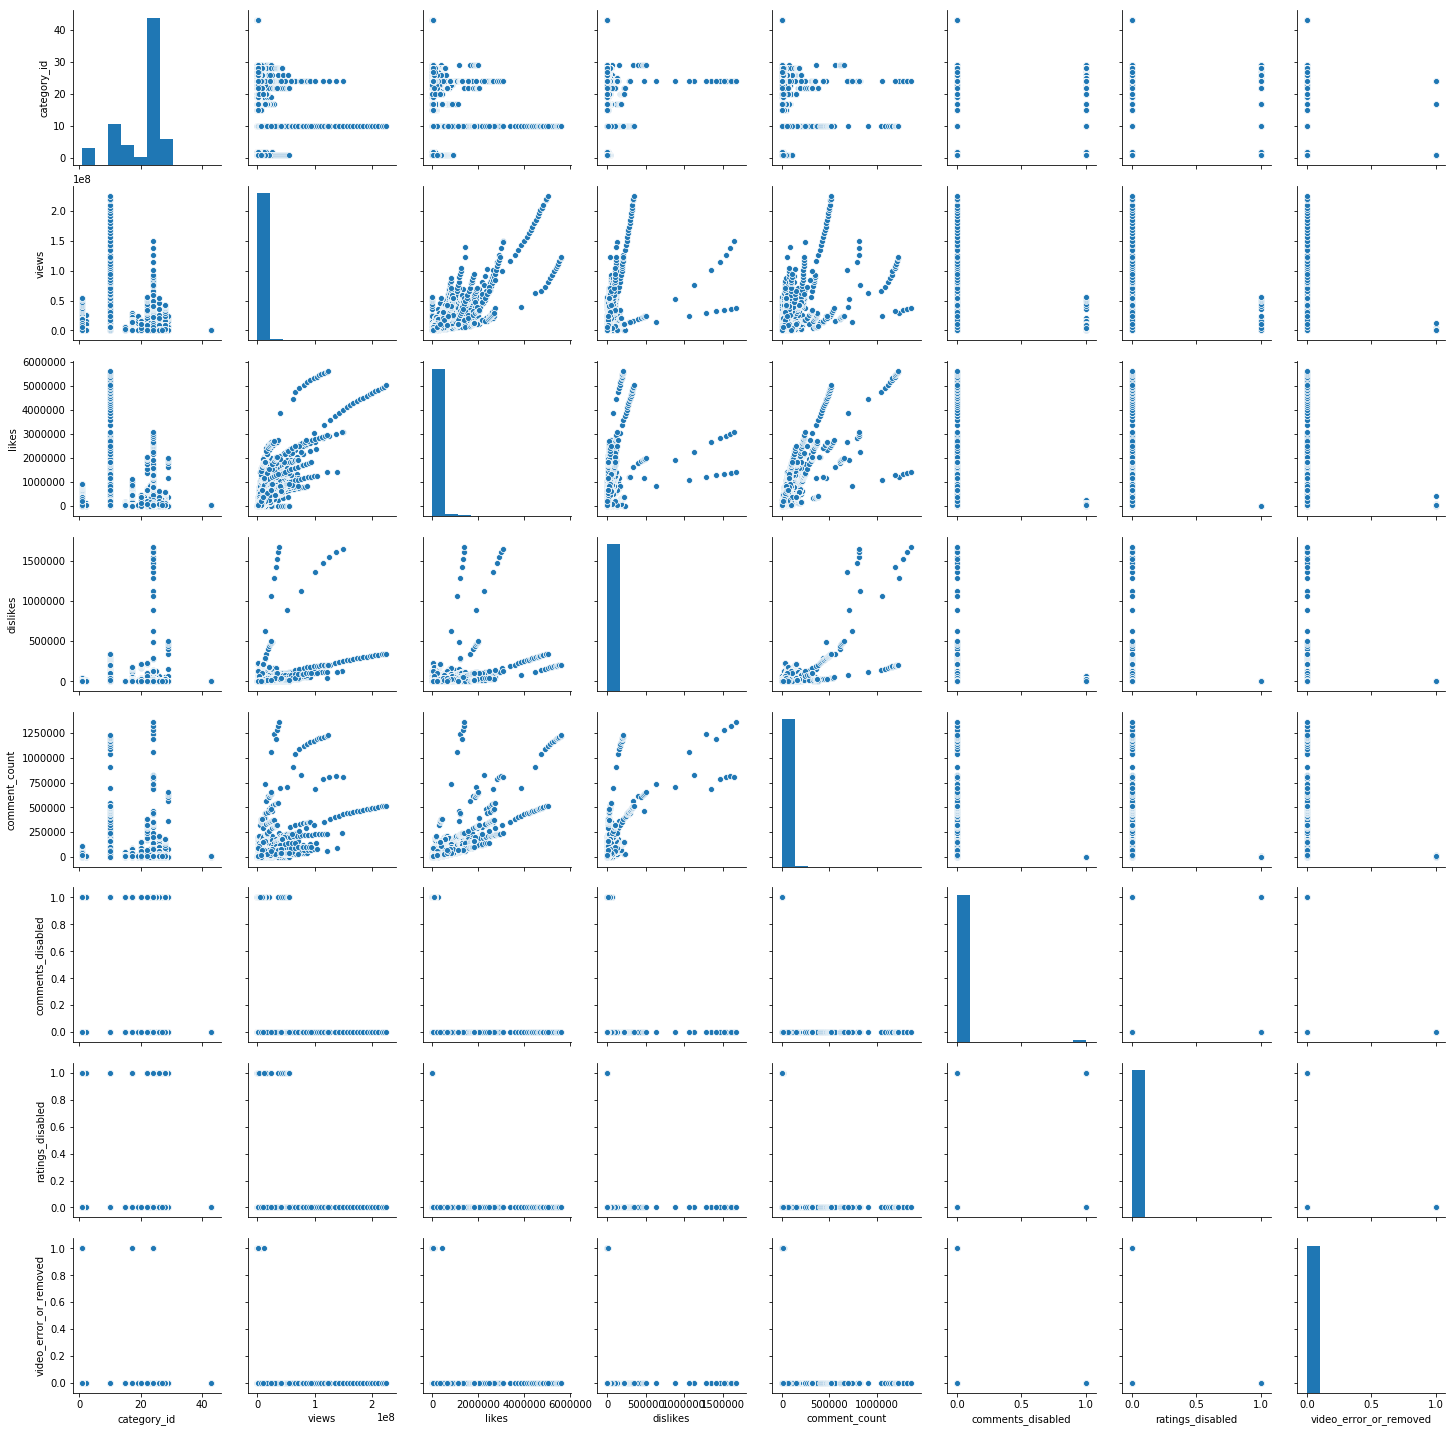

In [96]:
#Pairplot - scatterplots show you the relationships
sns.pairplot(usa)

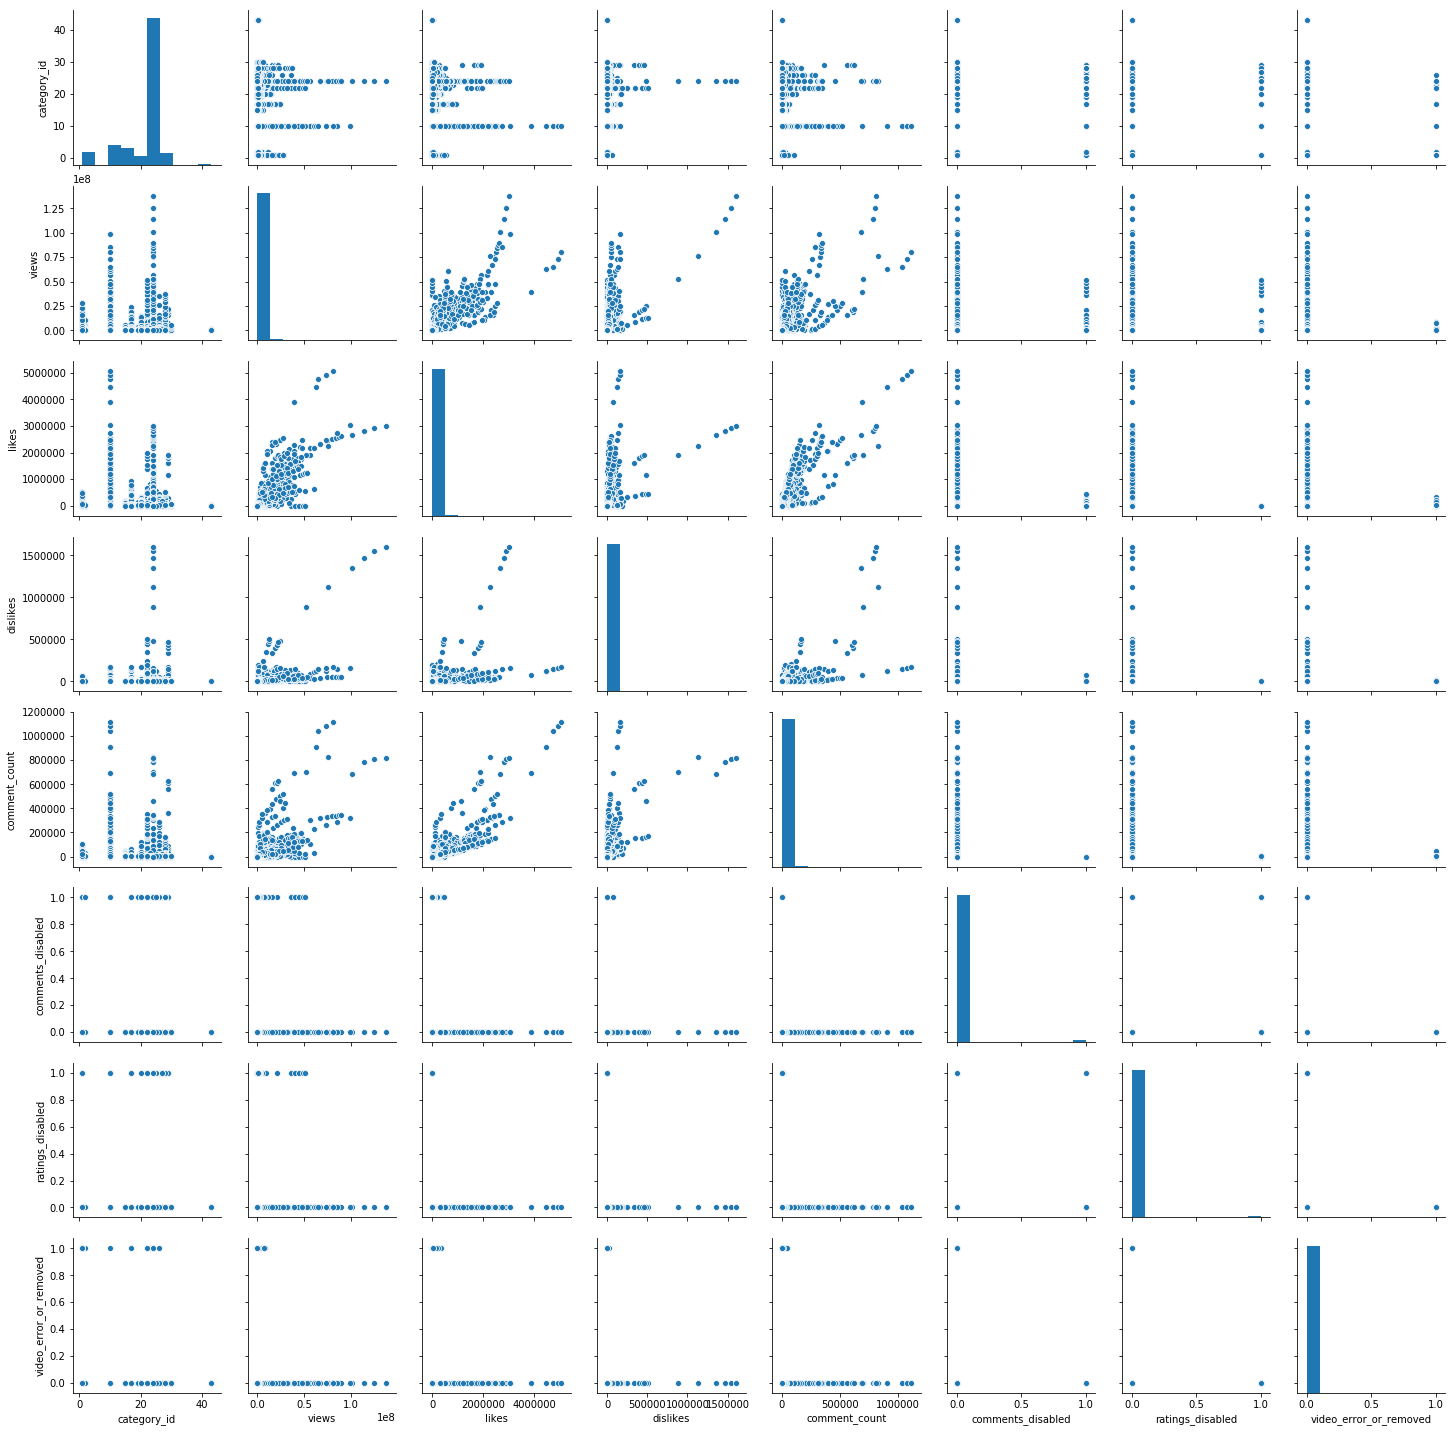

In [97]:
#Pairplot - scatterplots show you the relationships
sns.pairplot(canada)

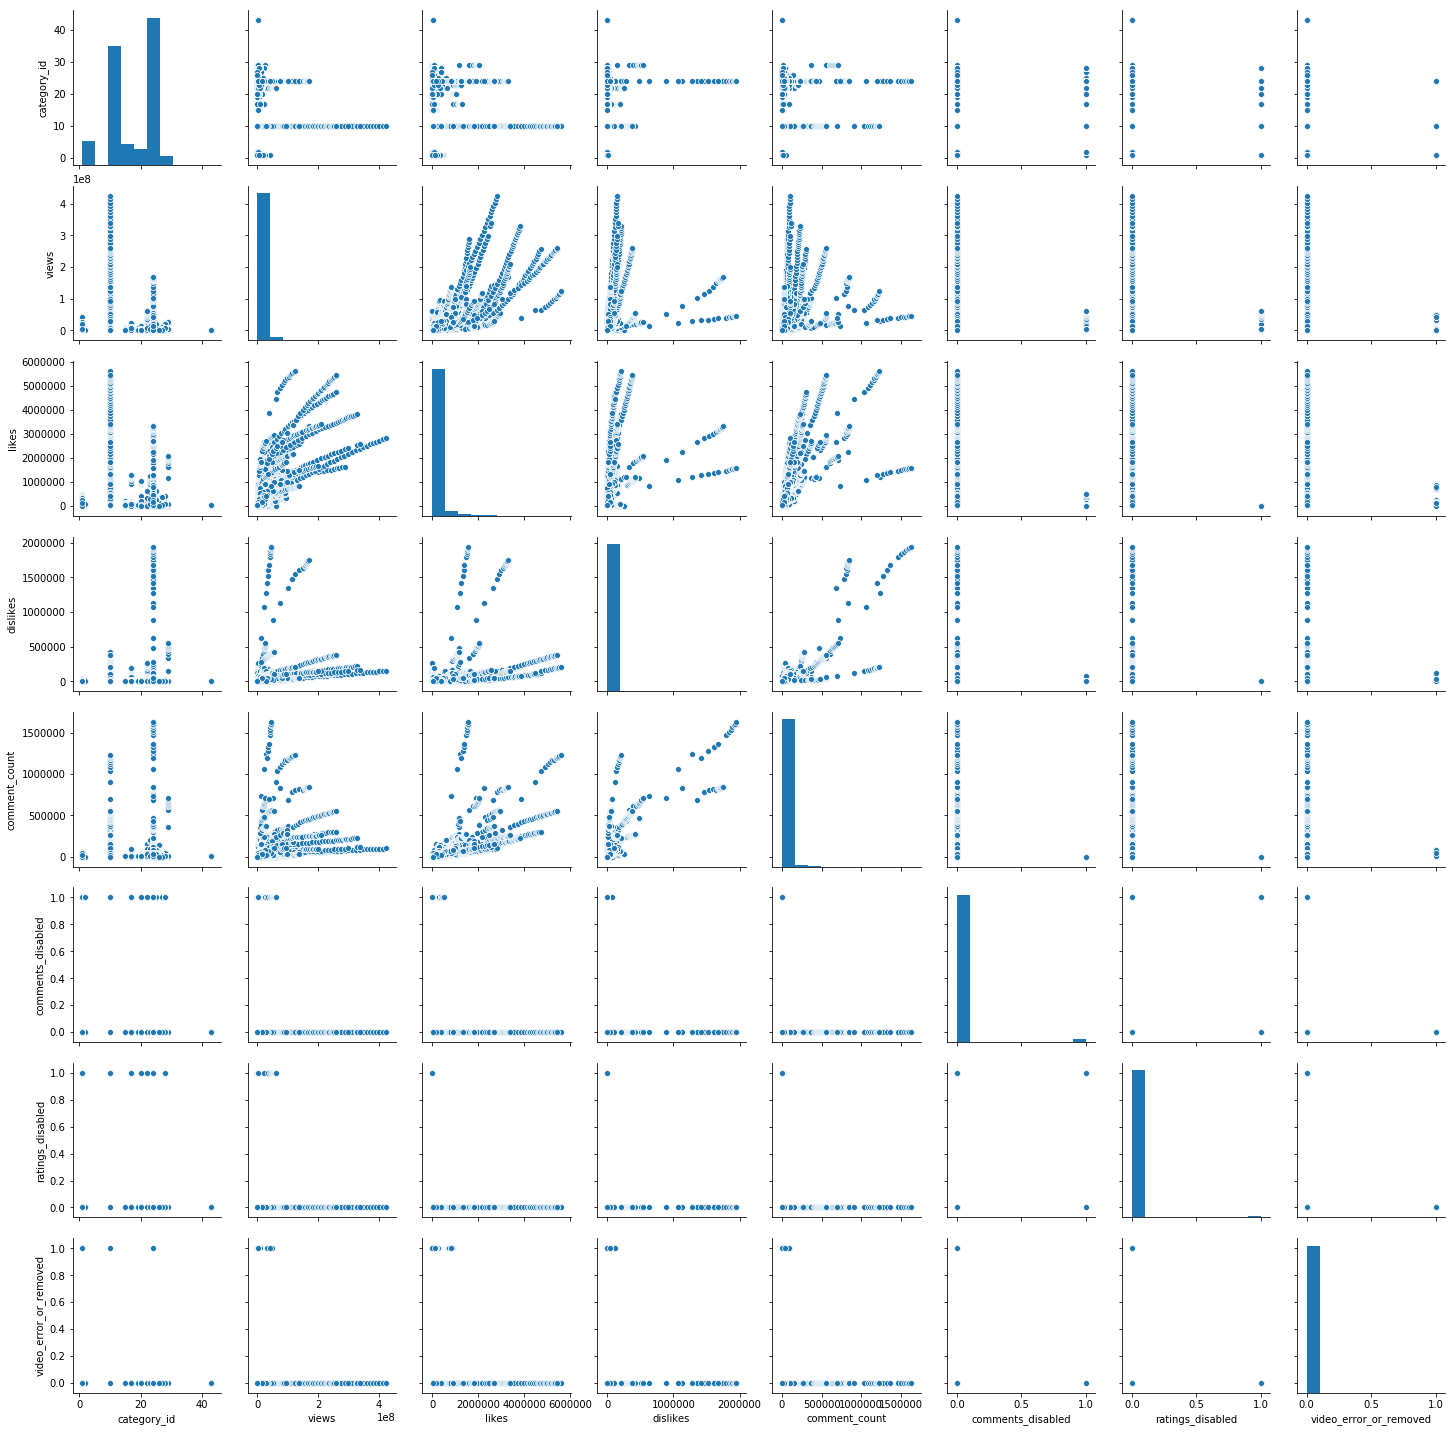

In [98]:
#Pairplot - scatterplots show you the relationships
sns.pairplot(g_britain)

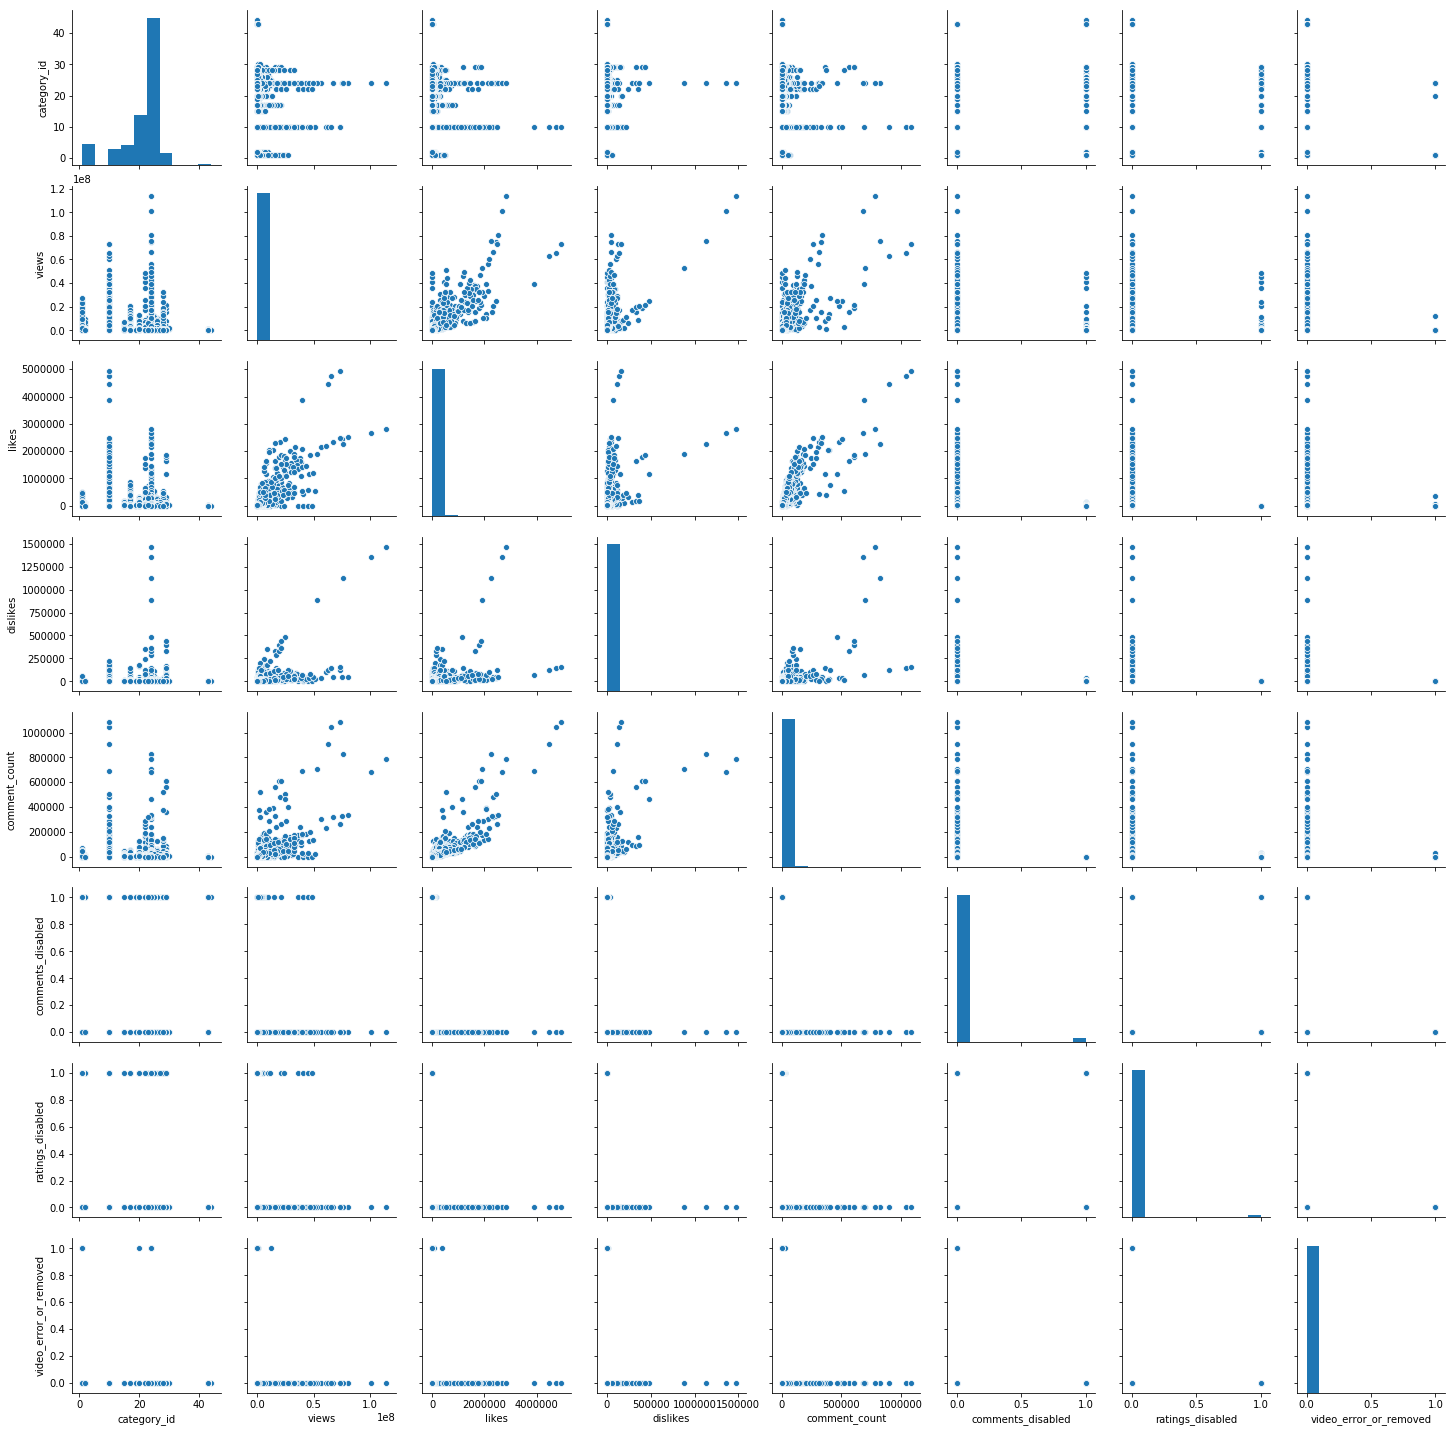

In [99]:
#Pairplot - scatterplots show you the relationships
sns.pairplot(germany)

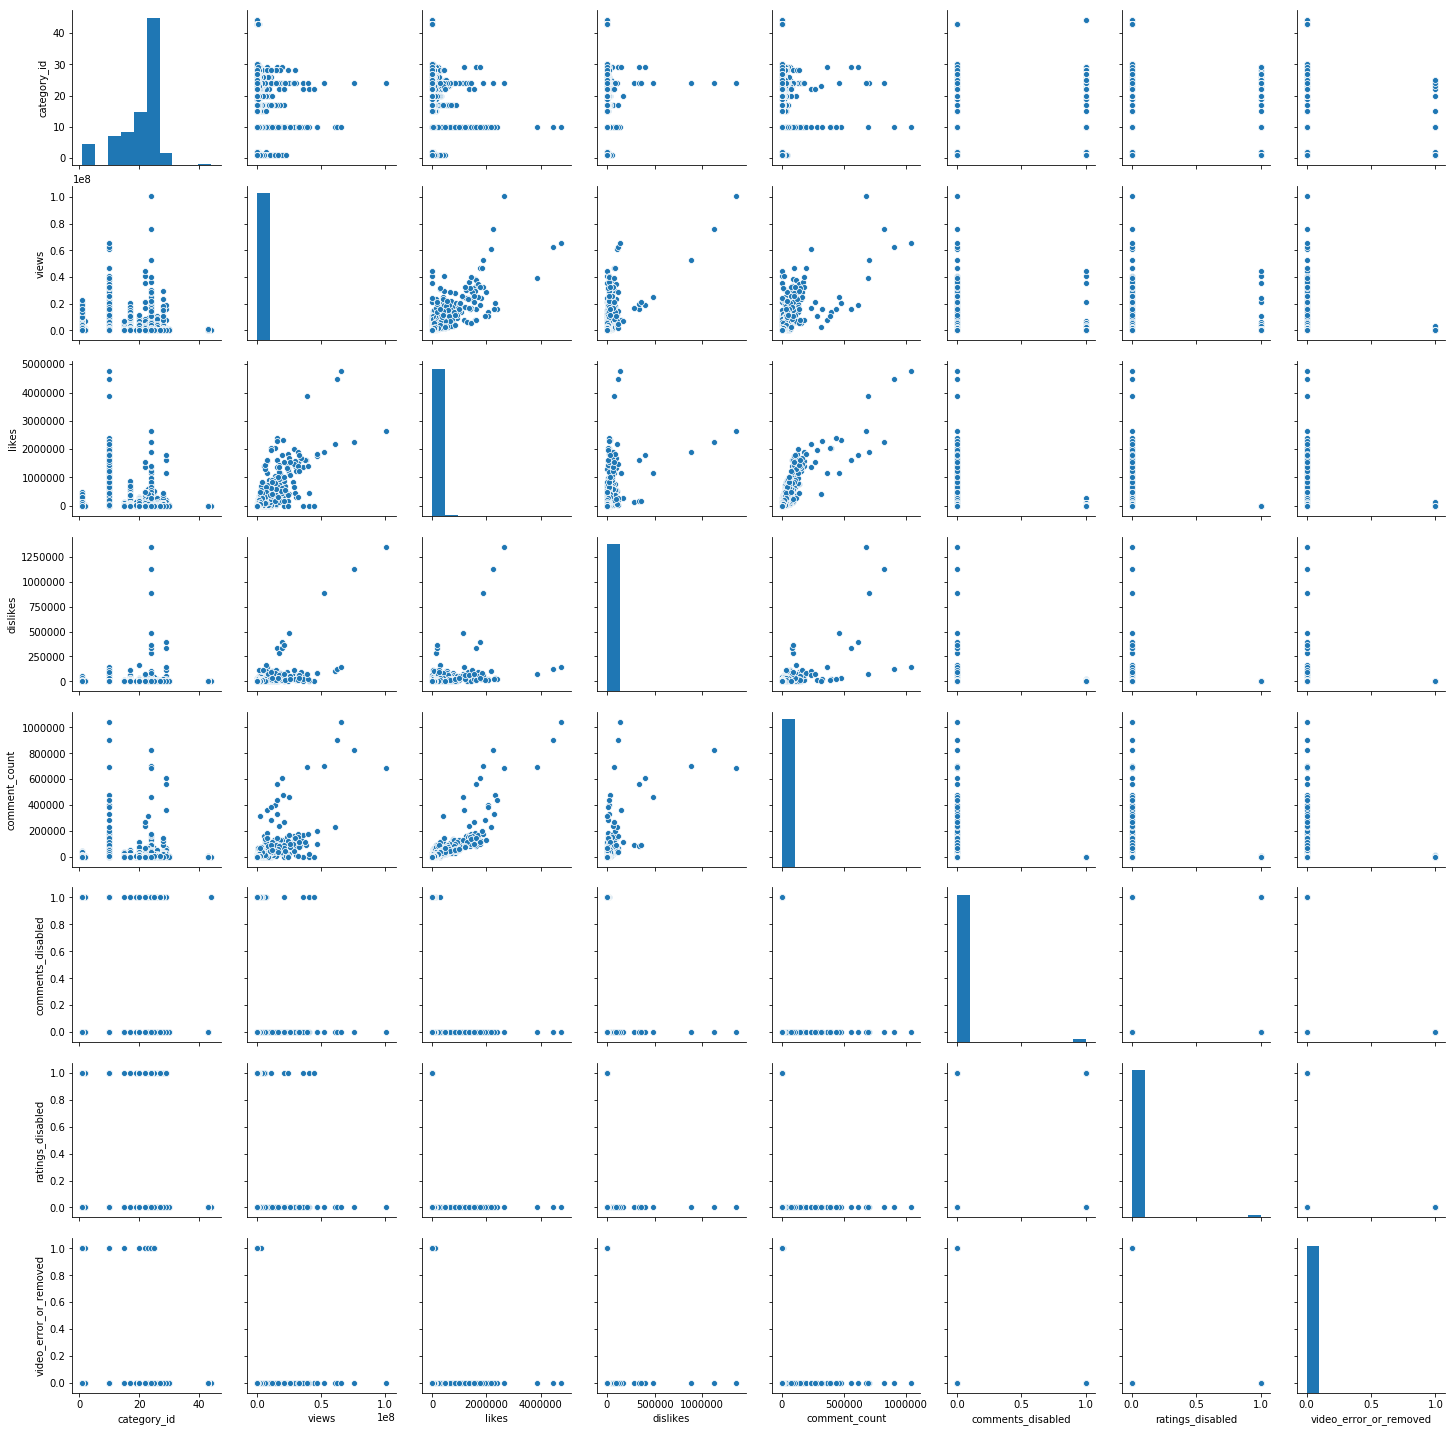

In [100]:
#Pairplot - scatterplots show you the relationships
sns.pairplot(france)

### Findings for Q1:

**Plot histograms for these metrics for the US. What can you say about them?**
The comment_count, likes, dislikes, and views have pretty different values and are hard to see when on the same scale. Let's see what happens when we use a log transformation and replot the histograms. 

**Try to apply a log transformation, and plot the histograms again. How do they look now?**
Using the same histogram format as the original visualizations, when applying a log transformation, we can better see a distribution for the number of likes, however, it is still hard to get a clear picture of the data trends for comment_count, likes, and dislikes.

After using a log-log transformation and plotting each columns data separately, we get a better representation of what is happening with the data. 

**Create a pairplot for the US, as we did in this week's lab. Do you see anything interesting?**
In the pairplot visualization for the US, it's interesting how the view counts and the likes correlate. When the view count is small, there is a cluster of data where the like count is small, as the view count increases, the like count streamlines and increase as view count increases. 

**Create additional pairplots for the other four regions. Do they look similar?**
The like count per view is interesting for each plot. In the Great Britain plot in particular, the like count per view seem to have distinct trend lines. All of the marginal distributions, or histograms, for each of the pairplots look to have similar trends. The data for Germany and France is a little more sparse compared to the other countries. 

### Q2. Create a heatmap of correlations between the variables for a region of your choice

>A [heat map (or heatmap)](https://en.wikipedia.org/wiki/Heat_map) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Seaborn makes it easy to create a heatmap with [`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Create a correlation matrix for your numeric variables using Pandas with [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). That is, if your dataframe is called `df`, use `df.corr()`.
* Pass in your correlation matrix to `seaborn.heatmap()`, and annotate it with the parameter `annot=True`.
* Are there any interesting correlations? What are they?

In [102]:
# Create a correlation matrix for numeric variables
usa_corr_matrix = usa.corr()
usa_corr_matrix

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000


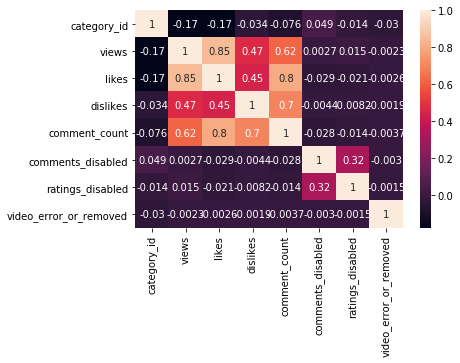

In [105]:
# Create a heatmap from the correlation matrix
sns.heatmap(usa_corr_matrix, annot=True)

### Findings for Q2:

* Create a correlation matrix for your numeric variables using Pandas with [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). That is, if your dataframe is called `df`, use `df.corr()`.
* Pass in your correlation matrix to `seaborn.heatmap()`, and annotate it with the parameter `annot=True`.
* Are there any interesting correlations? What are they?

**Interesting Correlations in the heatmap for the US YouTube data**
In the heat map some of the items that seem to have higher correlations are likes and views, comment count and views, comment count and likes, and comment count and dislikes. This isn't too surprising considering that the more people that watch a YouTube video, the more likely they are to comment on it or like it, and the more likely they are to comment on a video, the more likely they are to either like, or dislike the video since they are already taking the steps, or an action, to make a comment. 

### Q3. For 10 points: Create and compare OLS models using variables of your choice, for a region of your choice

* Use `statsmodels` to perform an ANOVA of a variable of your choice as the dependent variable (for example, *views*) and the *video category* as the independent variable. Provide your interpretation of the results.
* Create two different regression models where the dependent variables are the same, and the independent variables are different. What does your interpretation say about the two models?

**OLS for Great Britain using likes as the dependent variable and category id as the independent variable**

In [179]:
# model1 = our regression model
# QUESTION: can we predict likes from category id
# dependent variable is likes

# F statistic measures the variance between the two populations

# Initial code below did not work well - had to wrap category-id with a C() b/c it's a categorical variable
# model1 = smf.ols('likes ~ category_id', data=g_britain).fit()
# model1.summary()

model1 = smf.ols('likes ~ C(category_id)', data=g_britain).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     249.7
Date:                Tue, 09 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:31:46   Log-Likelihood:            -5.5022e+05
No. Observations:               38916   AIC:                         1.100e+06
Df Residuals:                   38900   BIC:                         1.101e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.721e+04   6585.908      8.686      0.000    4.43e+04    7.01e+04
C(category_id)[T.2]   -3.26e+04   2.86e+04     -1.139      0.255   -8.87e+04    2.35e+04
C(category_id)[T.10]  2.149e+05   7176.415     29.950      0.000    2.01e+05    2.29e+05
C(category_id)[T.15] -2.858e+04   1.59e+04     -1.798      0.072   -5.97e+04    2581.464
C(category_id)[T.17] -1.794e+04   1.01e+04     -1.776      0.076   -3.77e+04    1858.843
C(category_id)[T.19] -4.753e+04   3.48e+04     -1.368      0.171   -1.16e+05    2.06e+04
C(category_id)[T.20] -1.799e+04   1.03e+04     -1.748      0.081   -3.82e+04    2183.664
C(category_id)[T.22] -1.093e+04   9031.882     -1.210      0.226   -2.86e+04    6770.687
C(category_id)[T.23]  2.123e+04   1.02e+04      2.076      0.038    1187.287    4.13e+04
C(category_id)[T.24]  2.437e+04   7458.209      3.267      0.001    9748.564     3.9e+04
C(category_id)[T.25] -3.218e+04   1.16e+04     -2.774      0.006   -5.49e+04   -9442.537
C(category_id)[T.26] -3.057e+04   1.01e+04     -3.036      0.002   -5.03e+04   -1.08e+04
C(category_id)[T.27] -1.876e+04    1.7e+04     -1.106      0.269    -5.2e+04    1.45e+04
C(category_id)[T.28]  4325.6043   1.61e+04      0.269      0.788   -2.72e+04    3.59e+04
C(category_id)[T.29]  2.145e+05   3.59e+04      5.983      0.000    1.44e+05    2.85e+05
C(category_id)[T.43] -1.537e+04    7.5e+04     -0.205      0.838   -1.62e+05    1.32e+05
==============================================================================
Omnibus:                    48731.048   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8214031.556
Skew:                           6.909   Prob(JB):                         0.00
Kurtosis:                      72.819   Cond. No.                         48.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Create two different regression models where the dependent variables are the same, and the independent variables are different. What does your interpretation say about the two models?**

**OLS for Great Britain using likes as the dependent variable and views and commment count as the independent variables**

In [111]:
# model1 = our regression model
# QUESTION: can we predict likes from number of views
# dependent variable is likes

# F value tells is the variance between the two populations is different

model2 = smf.ols('likes ~ views', data=g_britain).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                 6.723e+04
Date:                Fri, 05 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:36:10   Log-Likelihood:            -5.3248e+05
No. Observations:               38916   AIC:                         1.065e+06
Df Residuals:                   38914   BIC:                         1.065e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.786e+04   1125.020     42.537      0.000    4.56e+04    5.01e+04
views          0.0147   5.65e-05    259.293      0.000       0.015       0.015
==============================================================================
Omnibus:                    35707.938   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9730472.850
Skew:                           3.722   Prob(JB):                         0.00
Kurtosis:                      80.107   Cond. No.                     2.08e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
# model1 = our regression model
# QUESTION: can we predict likes from comment count
# dependent variable is likes

model2 = smf.ols('likes ~ comment_count', data=g_britain).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                 4.835e+04
Date:                Fri, 05 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:35:58   Log-Likelihood:            -5.3629e+05
No. Observations:               38916   AIC:                         1.073e+06
Df Residuals:                   38914   BIC:                         1.073e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.722e+04   1223.645     54.936      0.000    6.48e+04    6.96e+04
comment_count     5.1417      0.023    219.890      0.000       5.096       5.188
==============================================================================
Omnibus:                    26734.084   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         54085230.354
Skew:                          -1.752   Prob(JB):                         0.00
Kurtosis:                     185.600   Cond. No.                     5.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Findings for Q3 

**Use statsmodels to perform an ANOVA of a variable of your choice as the dependent variable (for example, views) and the video category as the independent variable. Provide your interpretation of the results.**

For the first OLS model, Model 1, I chose to look at the data for Great Britain. Specifically, I looks at whether likes are dependent on the category ID. We can notice that the F-statistic provides a very large value, however, this value is not a great determiner of relationships due to the fact that each number value for the video category represents a category, and is a categorical variable, making this value not useful. In order to remedy this, I wrapped the categorical variable in a C, to give better values. 

The F statistic measures the variance between the mean values of two populations. For Model 1, we can see that the probability of the F statistic shows that they are not due to chance. 

**Create two different regression models where the dependent variables are the same, and the independent variables are different. What does your interpretation say about the two models?**
Model 2 and Model 3 show values that seem more consistent with ANOVA tests I have done in the past. Both variables are quantitative, allowing for an F-statistic that is probably more accurately describes the data that we hope to compare. For both models there are warnings stating that there may be strong multicollinearity or other numerical problems. 


## Part 2: Answer the questions below based on the *[Pokémon dataset](https://www.kaggle.com/abcsds/pokemon)*
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

### Q4. For 10 Points: Plot the pairs of different ability points (HP, Attack, Sp. Attack, Defense, etc.).

* Which pairs have the most/least correlation coefficients?

In [117]:
# First, let's take a look at the data types for the Pokemon data
pokemon.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

**Pairplot for different ability points**

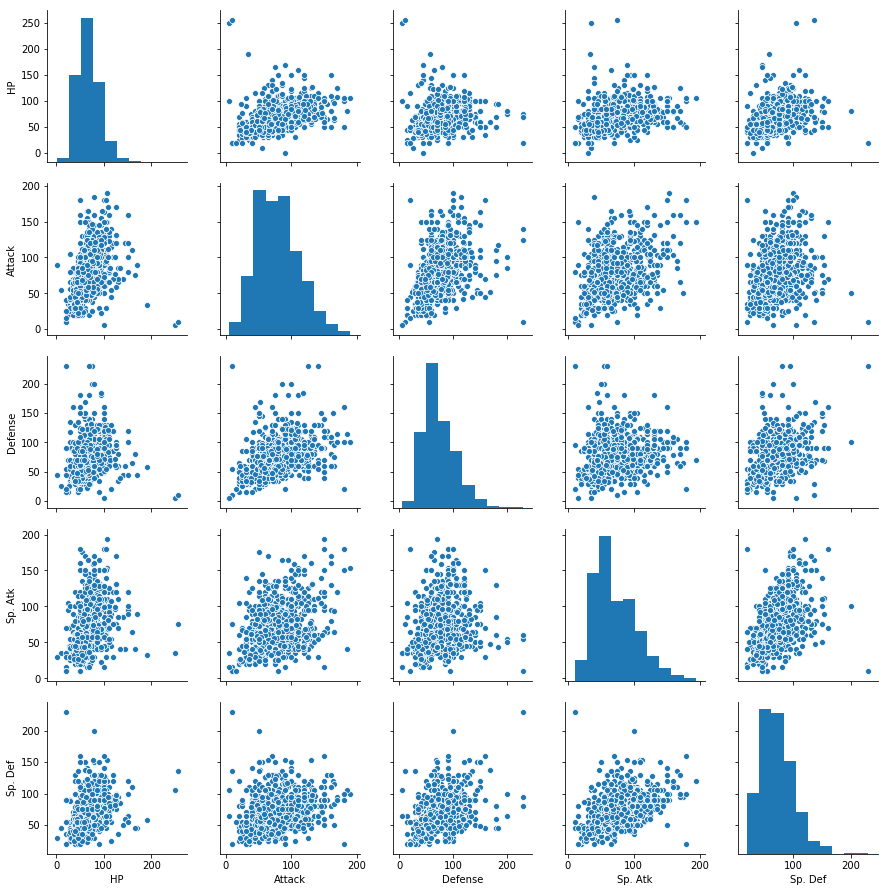

In [142]:
# Create a pairplot for all of the ability points to get overview of all of the data
sns.pairplot(pokemon, vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def'])

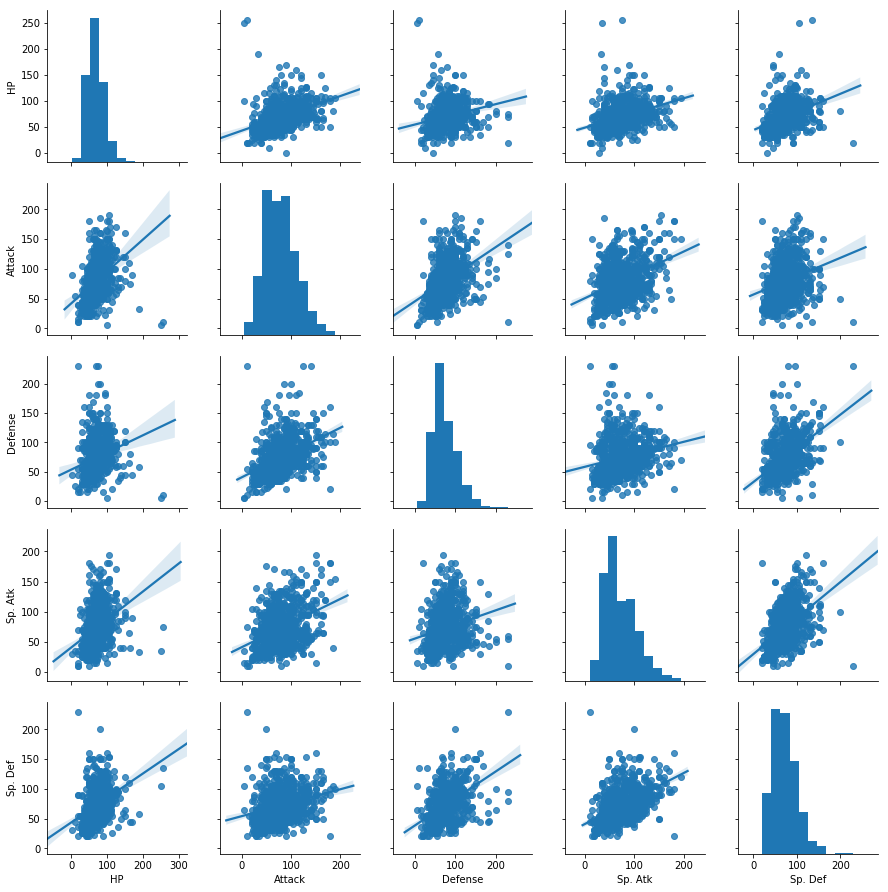

In [141]:
# Create a pairplot for all of the ability points to get overview of all of the data
# Doing a regression analysis for this pairplot
sns.pairplot(pokemon, vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def'], kind='reg')

**JointGrid Plot of HP and Attack - higher correlation coefficient**

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


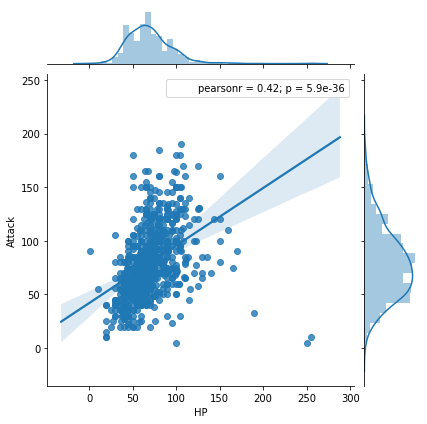

In [145]:
# sns.jointplot(x='attack',y='defense',data=pokemon, kind='hex')

# Since the data does not look normal, we use the spearmanr instead of the pearsonr

g = sns.JointGrid(data=pokemon, x='HP', y='Attack')
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)

**JointGrid Plot of Special Defense and Defense - higher correlation coefficient**

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


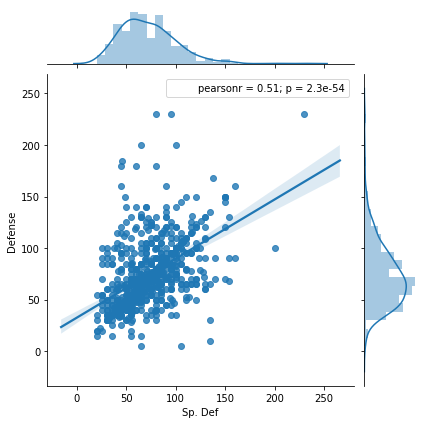

In [148]:
g = sns.JointGrid(data=pokemon, x='Sp. Def', y='Defense')
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)

**JointGrid Plot of HP and Defense - lower correlation coefficient**

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


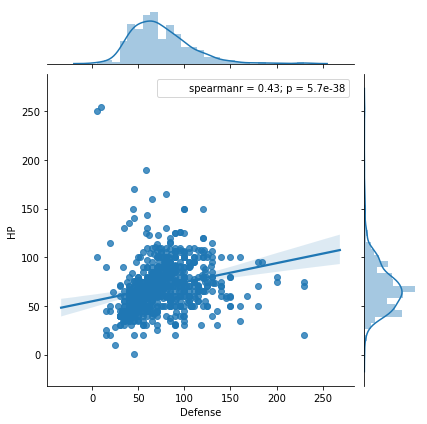

In [143]:
g = sns.JointGrid(data=pokemon, x='Defense', y='HP')
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.spearmanr)

## Findings for Q4

**Which pairs have the most/least correlation coefficients?**

From the pairplots and the JointGrid, we can see that there are varying degrees of correlation between each of the ability points. The abilities that seem to have the highest correlations are (first ability listed is the dependent, second ability is the independent): Attack and HP, Defense and Special Attack, Defense and Special Defense, Special Attack and HP, Special Defense and HP. The abilities that seem to have the lowest correlation values are (first ability listed is the dependent, second ability is the independent): HP and Defense, HP and Special Attack, Defense and Special Attack, and Special Defense and Attack. 

For more exact values, I chose to do a JoinGrid analysis for the first few with the highest looking correaltion values and the least looking correlation values. 

### Q5. For 10 Points: Plot the distribution of ability points per Pokémon type

* How would you describe each Pokémon type with different ability points?

In [202]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [203]:
pokemon['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [204]:
pokemon['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [200]:
# Print a list of all of the elements in Type 1 in order to do analysis
m = pokemon['Type 1'].unique()
print(m)
print(sorted(m))

# This creates a list of all the column elements for Type 1 in alphabetical order
a_order=['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 
            'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']
print('\n')
d = pokemon['Type 2'].unique()
# print(d)
b_order = sorted(['Poison', 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass', 'Fighting',
 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water', 'Electric', 'Fire', 'Ghost',
 'Bug', 'Normal'])
print(b_order)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']


['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']


In [168]:
print(len(m))

18


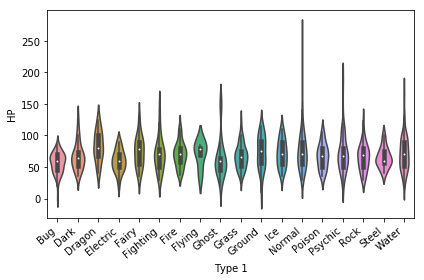

In [169]:
# Violin plot of HP for Type 1
ax = sns.violinplot('Type 1','HP',data=pokemon, order=a_order)

# Rotating tick labels so they don't overlap
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

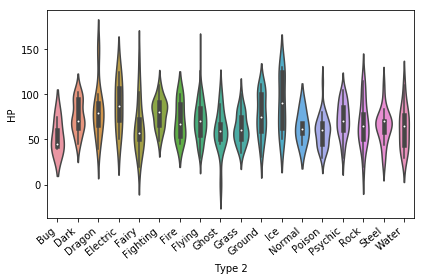

In [192]:
# Violin plot of HP for Type 2
ax = sns.violinplot('Type 2','HP',data=pokemon, order=b_order)

# Rotating tick labels so they don't overlap
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

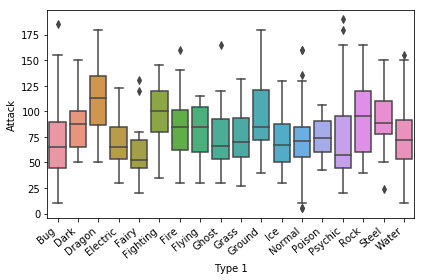

In [171]:
ax = sns.boxplot('Type 1','Attack',data=pokemon, order=a_order)

# Rotating tick labels so they don't overlap
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

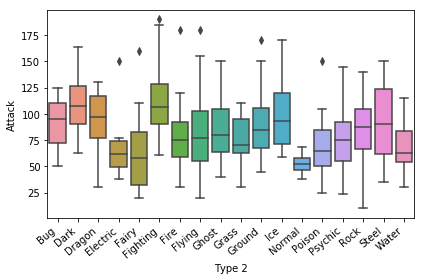

In [172]:
ax = sns.boxplot('Type 2','Attack',data=pokemon, order=a_order)

# Rotating tick labels so they don't overlap
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## Findings for Q5

For plotting the distribution of ability points, I chose to compare two types of ability points that seemed to have a lot of correlation when looking at the initial pairplot findings. I chose to focus on a subset of the whole data, including the HP and Attack ability points because they seem interesting. 

For the attack ability, we can see what seems to be a significant difference in range between Type 1 and Type 2, although the means look similar. the distribution for Normal is also quite different between Type 1 and Type 2. For Type 2, it looks to have a much smaller range and Type 1 has a few outliers that may be of interest.  

**How would you describe each Pokémon type with different ability points?**
The Pokemon show differences between Type 1 and Type 2 for both the Attack and HP abilities. I chose to plot them with both violin and box plots to help demonstrate differences in mean values, as well and range and quartiles. I set up each of the x-axes so the visualizations could be compared more easily. Both Type 1 and Type 2 seem to have values that vary quite a bit in range, mean, and quartiles. 

### Q6. For 10 Points: How the Pokémon in each generation differ from each other?

* Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation?

In [176]:
# put your code here
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [174]:
pokemon['Generation'].unique()

array([1, 2, 3, 4, 5, 6])

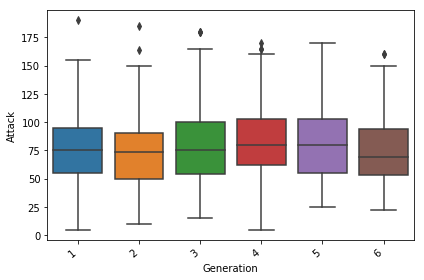

In [182]:
ax = sns.boxplot('Generation','Attack',data=pokemon)

# Rotating tick labels so they don't overlap
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

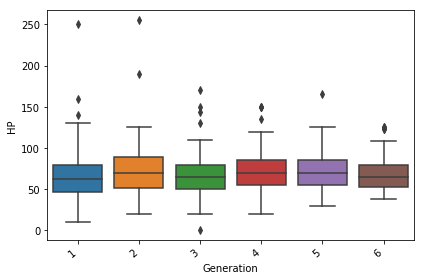

In [183]:
ax = sns.boxplot('Generation','HP',data=pokemon)

# Rotating tick labels so they don't overlap
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

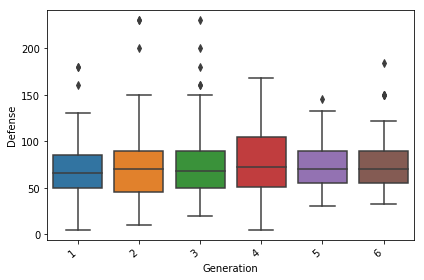

In [185]:
ax = sns.boxplot('Generation','Defense',data=pokemon)

# Rotating tick labels so they don't overlap
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

**Distribution of Total ability points across the 6 generations**

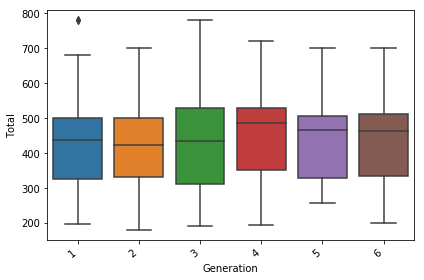

In [184]:
ax = sns.boxplot('Generation','Total',data=pokemon)

# Rotating tick labels so they don't overlap
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## Findings for Q6

**Do you think designers of Pokémon tried to address different distributions of ability points in each generation?**

To address the changed in abilites across generations, I first looked at the total number of generations, then plotted three of the abilities based upon each generation. Specifically, I plotted Attack, HP, and Defense against all of the 6 generations. I did not find these plots as useful when trying to determine differences. These plots were not as useful due to the means and quartiles being fairly similar from one generation to the next. I did find it useful to in determining outliers and a slight variance in range, but thought another method may be more helpful.

When looking at the distribution of the Total ability points per generation, we can see that in each new generation, the mean values for the Total ability points increase slightly. This was not apparent when looking at each ability one-by-one. 

### Q7. *Bonus* – For 5 Points: Which ability points were significantly different per Pokémon type?

In [ ]:
# put your code here

(Use this space to explain your answers)